##  Setup & Clone Repo

In [ ]:
!git clone https://github.com/Sruthi-Reddy-B/Object-detection-with-pose-visualization.git
%cd Object-detection-with-pose-visualization
!pip install -r requirements.txt

import os
os.makedirs('results/detections', exist_ok=True)
os.makedirs('results/visualization', exist_ok=True)


In [9]:
# Remove old image
!rm -f data/images/object_1.jpg

# Download a cubical/box object image for demo
!wget -q https://raw.githubusercontent.com/ultralytics/assets/main/images/cube.jpg -O data/images/object_1.jpg


## Download Demo Image & Create Dummy Pose

In [3]:
!mkdir -p data/images data/poses
!wget -q https://github.com/ultralytics/assets/releases/download/v0.0.0/bus.jpg -O data/images/object_1.jpg

import pandas as pd
pose_data = pd.DataFrame({
    'image': ['object_1.jpg'],
    'x': [120.5], 'y': [85.3], 'z': [0.55],
    'roll': [10.0], 'pitch': [5.0], 'yaw': [45.0]
})
pose_data.to_csv("data/poses/pose_labels.csv", index=False)


## Train YOLO Model (Optional Demo)

In [ ]:
# This uses src/train.py
#!python src/train.py


## Run Inference & Visualize 6D Pose


In [4]:
# Download YOLOv8 pre-trained weights if not present
import os
if not os.path.exists("yolov8n.pt"):
    !wget -q https://github.com/ultralytics/assets/releases/download/v8.3.0/yolov8n.pt -O yolov8n.pt



In [5]:
!python src/inference.py

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/Object-detection-with-pose-visualization/data/images/object_1.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 542.4ms
Speed: 27.5ms preprocess, 542.4ms inference, 45.8ms postprocess per image at shape (1, 3, 640, 480)
Estimated 6D Pose Matrix:
 [[    0.70442    -0.68566     0.18348       120.5]
 [    0.70442     0.70707   -0.062096        85.3]
 [  -0.087156     0.17299     0.98106        0.55]]
Pose visualization saved at: results/visualization/pose_axes.jpg


## Display Results in Notebook

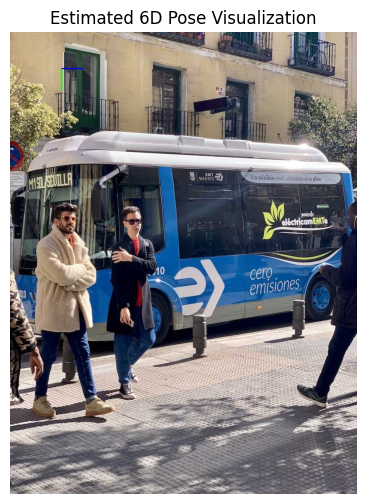

In [6]:
import cv2
import matplotlib.pyplot as plt

img_pose = cv2.imread('results/visualization/pose_axes.jpg')
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(img_pose, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Estimated 6D Pose Visualization")
plt.show()
